In [3]:
import pandas as pd

from hyperopt import hp
import numpy as np
from hyperopt import Trials, tpe, fmin
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold

from joblib import load
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv("output.csv",index_col=False)

In [4]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [12]:
selected_columns=["locus tag","essential","DNA","protein sequence"]
Xs= df.drop(columns=selected_columns)
y=df["essential"]

In [8]:
model = load("../../model/RF_model.joblib")

In [31]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_rf = []

# 对每个折叠进行迭代
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # 对训练集进行下采样
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    # 在下采样后的训练集上训练模型
    model.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_rf.append(accuracy_fold)

0.6333333333333333
0.5666666666666667
0.6101694915254238
0.6779661016949152
0.6101694915254238
0.6101694915254238
0.6949152542372882
0.6271186440677966
0.6101694915254238
0.5423728813559322


In [18]:
model_rf_fs = load("../../model/RF_FS_model.joblib")

In [32]:
from sklearn.feature_selection import RFE
accuracy_rf_fs = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    rfe = RFE(model_rf_fs, n_features_to_select=9)
    X_selected = rfe.fit_transform(X_train_undersampled, y_train_undersampled)
    model_rf_fs.fit(X_selected,y_train_undersampled)
    X_test = rfe.fit_transform(X_test_fold,y_test_fold)
    y_pred_fold = model_rf_fs.predict(X_test)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_rf_fs.append(accuracy_fold)

0.43333333333333335
0.5666666666666667
0.5254237288135594
0.6271186440677966
0.559322033898305
0.5254237288135594
0.3728813559322034
0.5084745762711864
0.5254237288135594
0.4915254237288136


In [33]:
model_xgb = load("../../model/XGB_model.joblib")
accuracy_xgb = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_xgb.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_xgb.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_xgb.append(accuracy_fold)

0.6
0.6166666666666667
0.559322033898305
0.6101694915254238
0.6271186440677966
0.6440677966101694
0.6610169491525424
0.6610169491525424
0.559322033898305
0.5932203389830508


In [34]:
model_xgb_fs = load("../../model/XGB_FS_model.joblib")
accuracy_xgb_fs = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    rfe = RFE(model_xgb_fs, n_features_to_select=6)
    X_selected = rfe.fit_transform(X_train_undersampled, y_train_undersampled)
    model_xgb_fs.fit(X_selected,y_train_undersampled)
    X_test = rfe.fit_transform(X_test_fold,y_test_fold)
    y_pred_fold = model_xgb_fs.predict(X_test)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_xgb_fs.append(accuracy_fold)

0.4666666666666667
0.5666666666666667
0.5254237288135594
0.4576271186440678
0.5423728813559322
0.4406779661016949
0.559322033898305
0.559322033898305
0.576271186440678
0.4745762711864407


In [35]:
model_mlp = load("../../model/MLP_model.joblib")
accuracy_mlp = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_mlp.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_mlp.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_mlp.append(accuracy_fold)

0.6166666666666667
0.45
0.576271186440678
0.576271186440678
0.6271186440677966
0.6440677966101694
0.6610169491525424
0.6779661016949152
0.6101694915254238
0.4915254237288136


In [36]:
model_svm = load("../../model/SVM_model.joblib")
accuracy_svm = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_svm.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_svm.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_svm.append(accuracy_fold)

0.6
0.5166666666666667
0.559322033898305
0.5932203389830508
0.6440677966101694
0.6271186440677966
0.6949152542372882
0.6271186440677966
0.576271186440678
0.5254237288135594


In [37]:
model_nb = load("../../model/NB_model.joblib")
accuracy_nb = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_nb.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_nb.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_nb.append(accuracy_fold)

0.5166666666666667
0.55
0.5423728813559322
0.559322033898305
0.576271186440678
0.6271186440677966
0.559322033898305
0.559322033898305
0.6271186440677966
0.6271186440677966


In [39]:
models = ['Random Forest', 'XGBoost', 'Naive Bayes', 'MLP', 'SVM']

# 创建一个包含均值和方差的字典
data = {
    'Model': models,
    'Mean Accuracy': [pd.Series(accuracy_rf).mean(), pd.Series(accuracy_xgb).mean(), pd.Series(accuracy_nb).mean(), pd.Series(accuracy_mlp).mean(), pd.Series(accuracy_svm).mean()],
    'Variance': [pd.Series(accuracy_rf).var(), pd.Series(accuracy_xgb).var(), pd.Series(accuracy_nb).var(), pd.Series(accuracy_mlp).var(), pd.Series(accuracy_svm).var()]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 将DataFrame写入CSV文件
df.to_csv('model_accuracy.csv', index=False)

In [43]:
models = ['Random Forest', 'XGBoost']

# 创建一个包含均值和方差的字典
data = {
    'Model': models,
    'Mean Accuracy': [pd.Series(accuracy_rf_fs).mean(), pd.Series(accuracy_xgb_fs).mean()],
    'Variance': [pd.Series(accuracy_rf_fs).var(), pd.Series(accuracy_xgb_fs).var()]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 将DataFrame写入CSV文件
df.to_csv('model_fs_accuracy.csv', index=False)

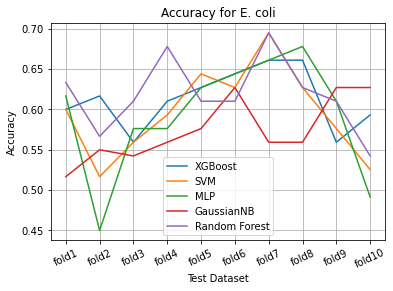

In [41]:
x = [f"fold{i}" for i in range(1, 11)]
plt.plot(x, accuracy_xgb, label='XGBoost')
plt.plot(x, accuracy_svm, label='SVM')
plt.plot(x, accuracy_mlp, label='MLP')
plt.plot(x, accuracy_nb, label='GaussianNB')
plt.plot(x, accuracy_rf, label='Random Forest')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracy for E. coli')
plt.xlabel('Test Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
# 显示图形
plt.grid(True)
plt.savefig('E coli.jpg')
plt.show()

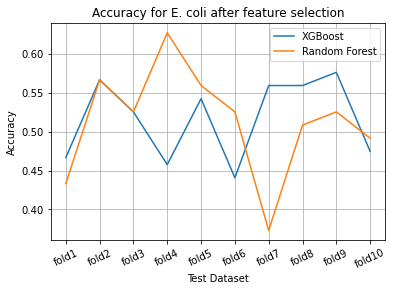

In [42]:
x = [f"fold{i}" for i in range(1, 11)]
plt.plot(x, accuracy_xgb_fs, label='XGBoost')
plt.plot(x, accuracy_rf_fs, label='Random Forest')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracy for E. coli after feature selection')
plt.xlabel('Test Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
# 显示图形
plt.grid(True)
plt.savefig('E coli_fs.jpg')
plt.show()